#### Link to Github repository: 
https://github.com/almafaz/CSSAssignments

# Computational Social Science 2022 - Assignment 1
#### by Alma Fazlagic (s194271), Natasha Norsker (s194270) & Simone von Mehren (s190739)

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?
> * **Always-on**. Can you keep collecting data over time?
> * **Non-reactive**. Is the dataset non-reactive?
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 
> * **Inaccessible**. Is the data accessible? 
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
> * **Dirty**. What aspect may make this dataset *dirty*?
> * **Sensitive**. Is there any sensitive information in the data?

## Part 2: activity on Reddit and GME prices


Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

In [9]:
#import everything
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from scipy import stats

In [2]:
#load the GME market dataset and the comments dataset
GME_data = pd.read_csv("GME_data.csv",parse_dates=["Date"]).set_index("Date")

In [62]:
comments = pd.read_csv("GME_comments_pd.csv")
comments["date"]=comments["created_utc"].apply(lambda x: dt.datetime.utcfromtimestamp(x)).dt.date
comments["date"] = pd.to_datetime(comments['date'])
comments = comments.set_index("date")

In [63]:
#filter data such that we only have between 1/1/2020 and 25/1/2021
GME_data = GME_data[(GME_data.index < "2021-01-26")]
comments = comments[(comments.index < "2021-01-26")]

In [93]:
#create a dataframe for daily comments for easier plotting
dailycom_df = pd.DataFrame({"num_com": comments.value_counts("date").sort_index().values,
                           "date": comments.value_counts("date").sort_index().index})
dailycom_df = dailycom_df.set_index("date")

In [65]:
#compute rolling average over volume and number of comments:
rolled_volume = GME_data["Volume"].rolling("7D").mean()
rolled_comments = dailycom_df["num_com"].rolling("7D").mean()

In [60]:
#set up plotting:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["lines.linewidth"] = 1

setup_mpl()

myFmt = mdates.DateFormatter("%b %Y")

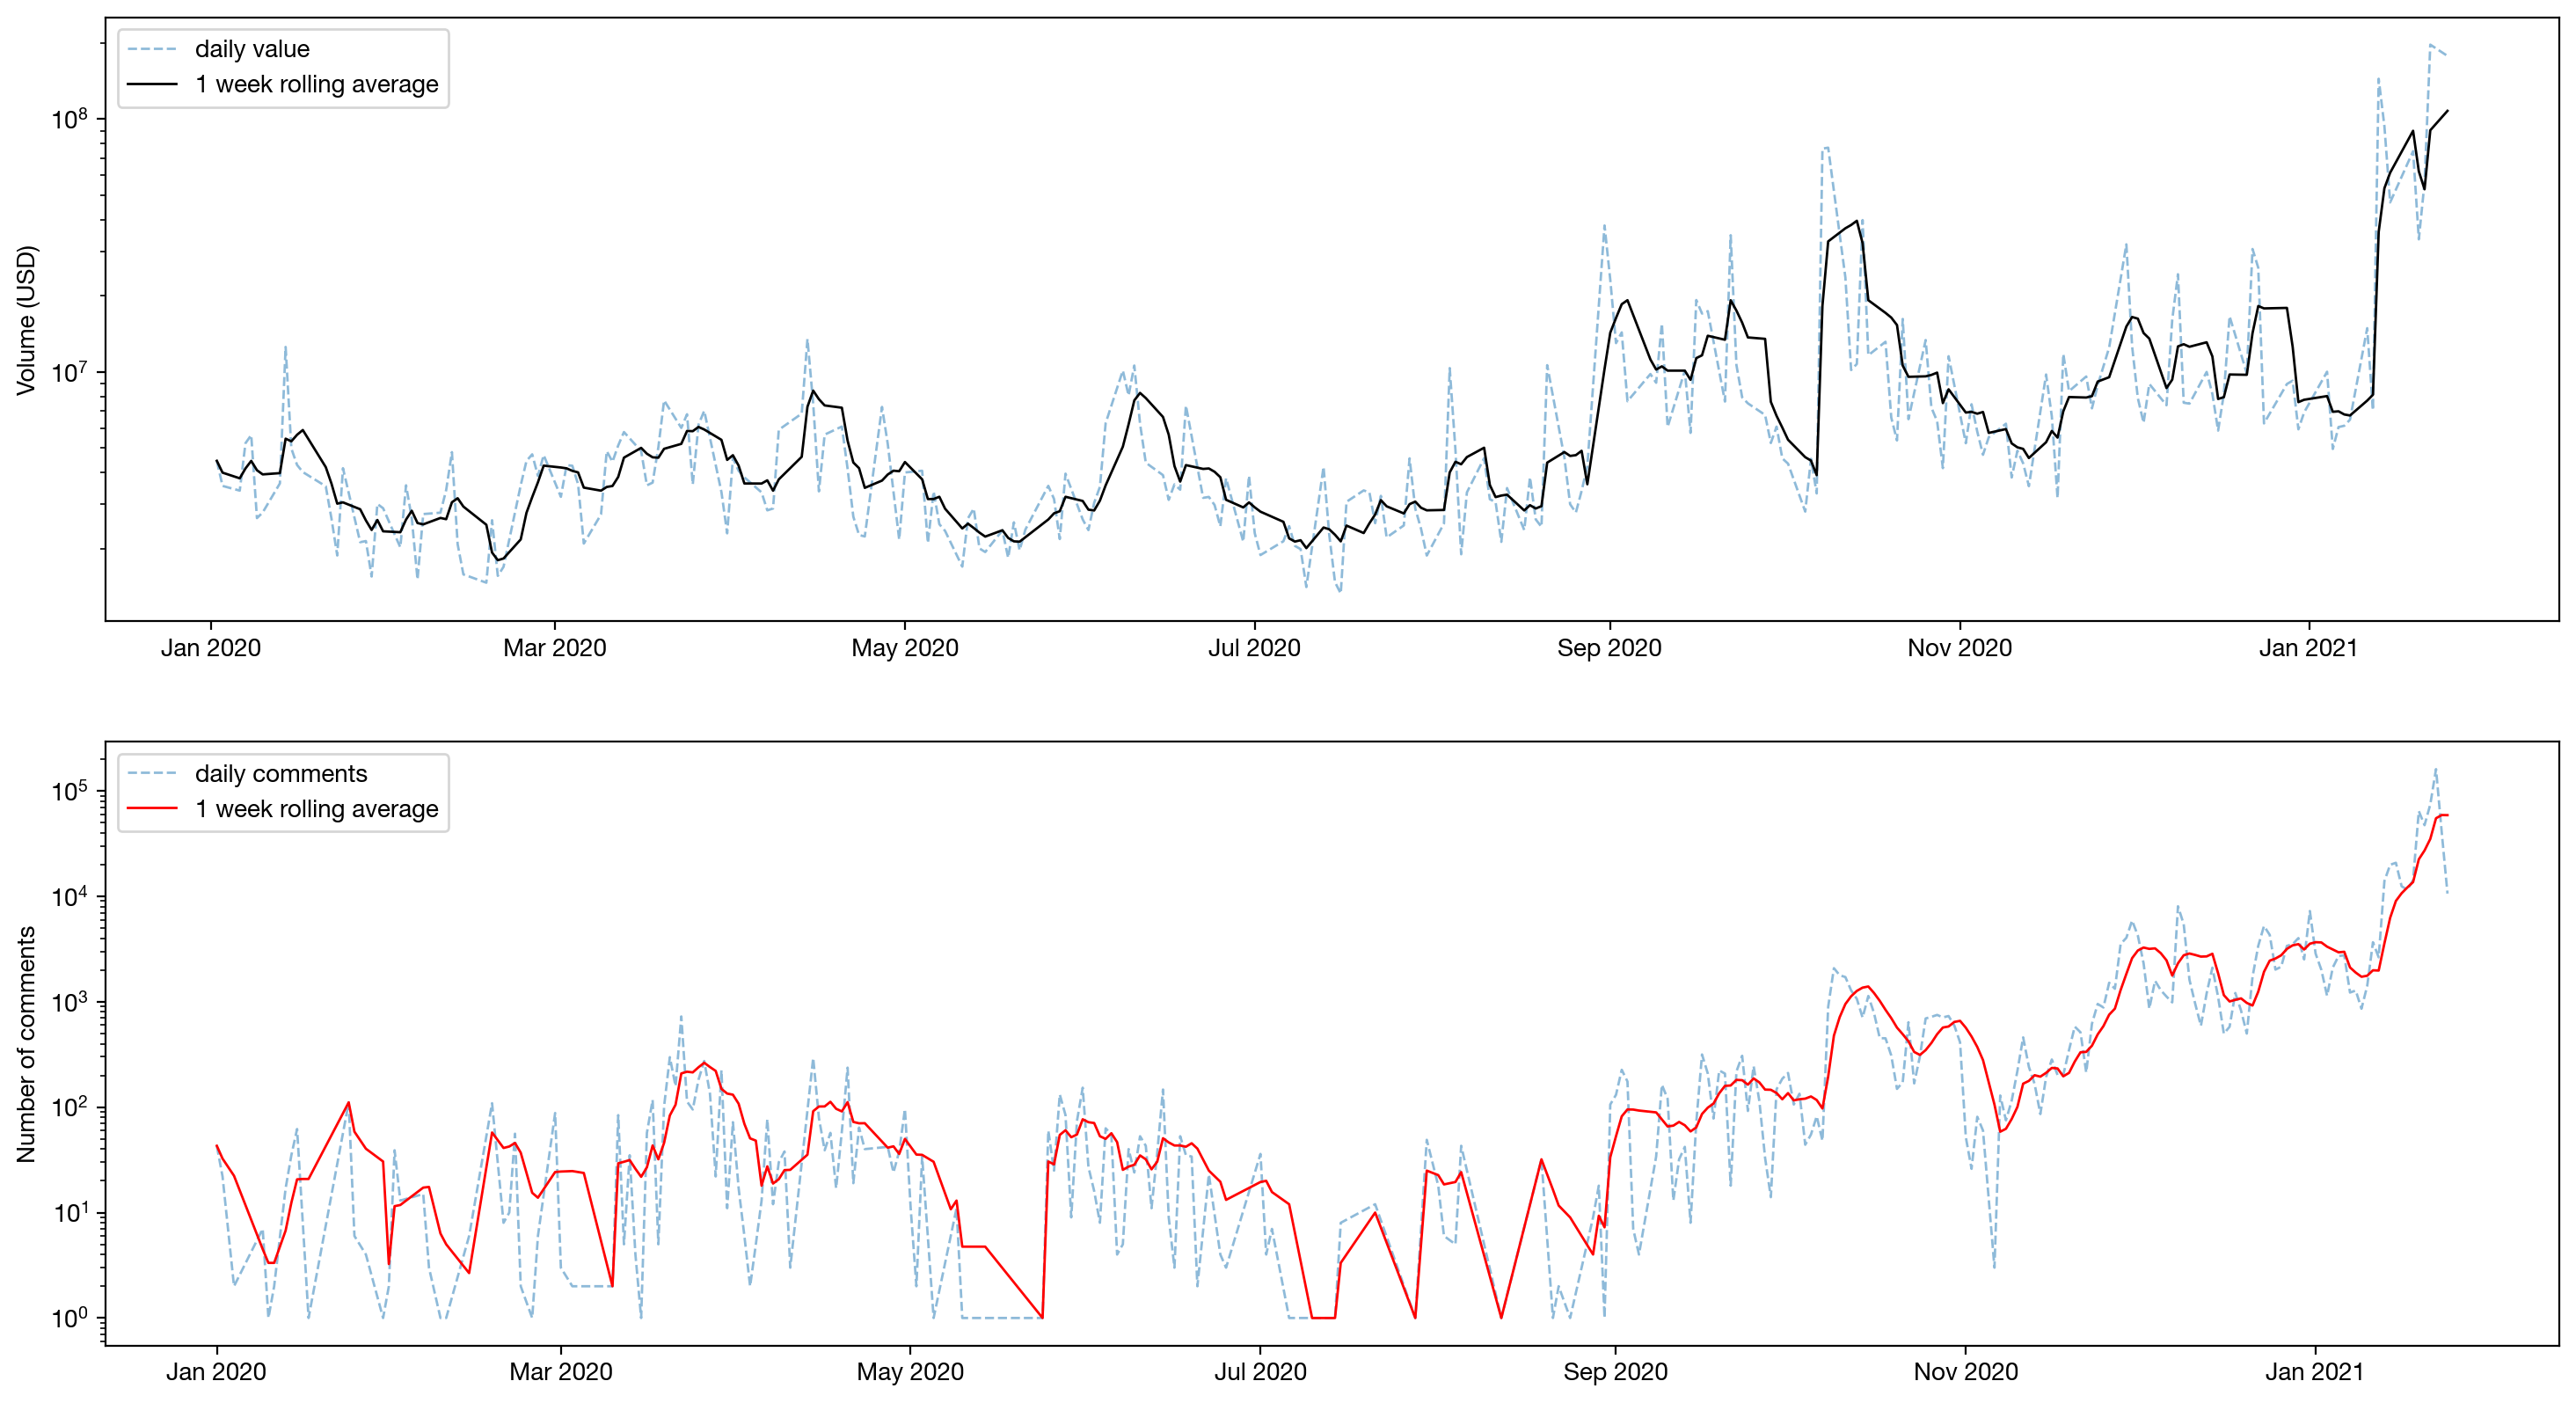

In [66]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,figsize=(18,10), dpi = 200)
ax1.plot(GME_data.index,GME_data.Volume, ls = "--", alpha=0.5,label="daily value")
ax1.plot(GME_data.index,rolled_volume,color="k",label="1 week rolling average")
ax1.set_ylabel("Volume (USD)")
ax1.set_yscale("log")
ax1.legend()
ax1.xaxis.set_major_formatter(myFmt)


ax2.plot(dailycom_df.index,dailycom_df.values,ls = "--",alpha=0.5,label="daily comments")
ax2.plot(dailycom_df.index,rolled_comments,color="r",label="1 week rolling average")
ax2.set_ylabel("Number of comments")
ax2.set_yscale("log")
ax2.legend()
ax2.xaxis.set_major_formatter(myFmt)


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*




In [71]:
#computing daily log returns for the GME market data:
GME_data['log_ret'] = np.log(GME_data.Close) - np.log(GME_data.Close.shift(1))

#computing the daily log-cgange in number of new comments:
dailycom_df['log_change'] = np.log(dailycom_df.num_com) - np.log(dailycom_df.num_com.shift(1))

#in order to match the dates from the two datasets, we merge them:
merged_df = pd.merge(GME_data, dailycom_df, left_index=True, right_index=True, how='inner').dropna()

In [83]:
#computing  the correlation between the two series:
corr1, p1 = stats.pearsonr(merged_df['2020-01-01':'2020-12-31']['log_ret'], merged_df['2020-01-01':'2020-12-31']['log_change'])
corr2, p2 = stats.pearsonr(merged_df['2021-01-01':'2021-12-31']['log_ret'], merged_df['2021-01-01':'2021-12-31']['log_change'])

print("Correlation and p-value between log return and log change \n \n2020:", round(corr1,3), "\n")
print("2021:", round(corr2,3))

Correlation and p-value between log return and log change 
 
2020: 0.308 

2021: 0.624


In [80]:
#statistically significant?
print("2020:", round(p1,5), "\n")
print("2021:", round(p2,5))

2020: 2e-05 

2021: 0.01698


In [88]:
#split dataframe up for easier plotting
df_2020 = merged_df[merged_df.index<"2021"]
df_2021 = merged_df[merged_df.index>"2021"]

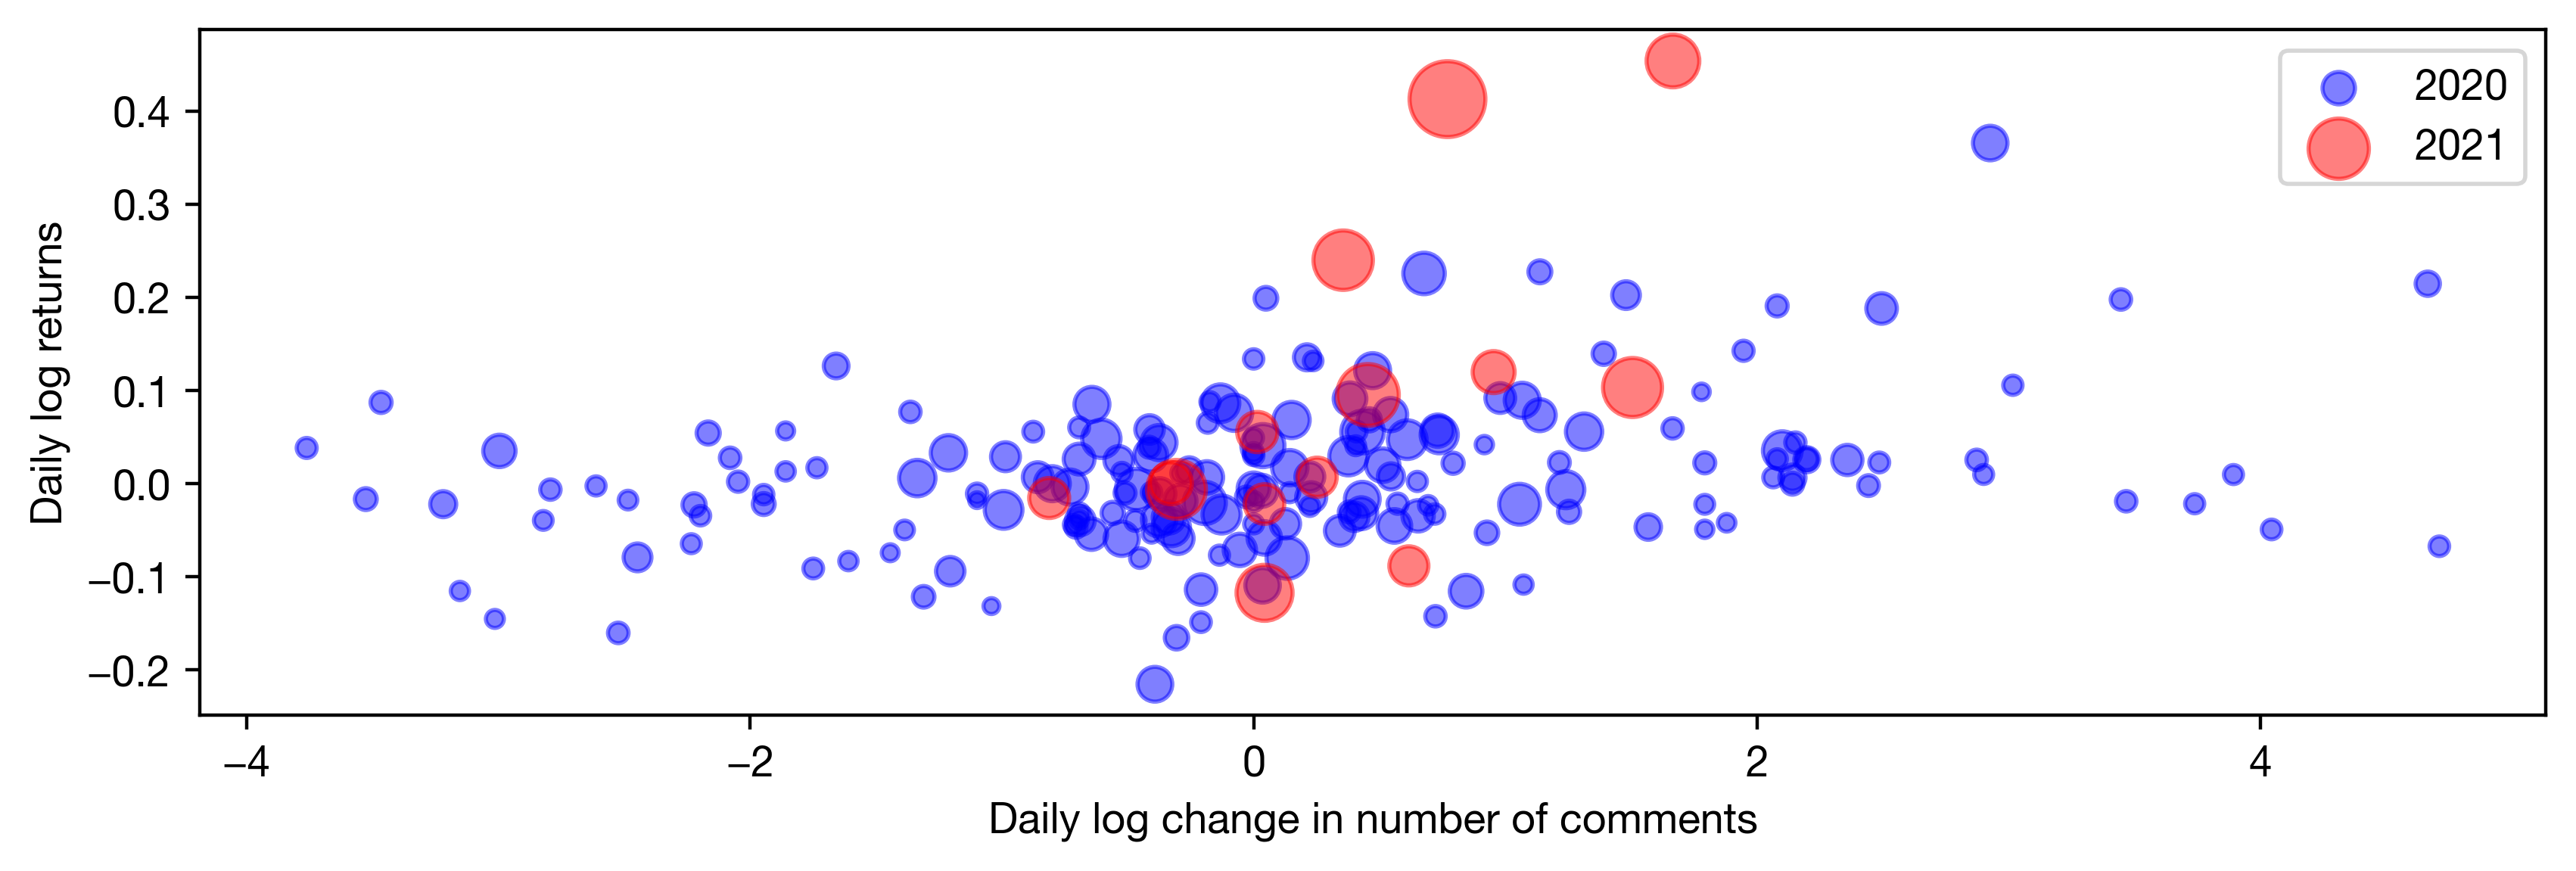

In [92]:
fig, ax = plt.subplots(figsize=(10,3), dpi = 400)

ax.scatter(x = df_2020["log_change"],
          y = df_2020["log_ret"], color="b", alpha=0.5,
          s = df_2020["Close"]*5, label="2020")

ax.scatter(x = df_2021["log_change"],
          y = df_2021["log_ret"], color="r", alpha=0.5,
          s = df_2021["Close"]*5, label="2021")

ax.set_ylabel("Daily log returns")
ax.set_xlabel("Daily log change in number of comments")
ax.legend()
plt.show()

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

### Exercise 2.1 - Königsberg Problem

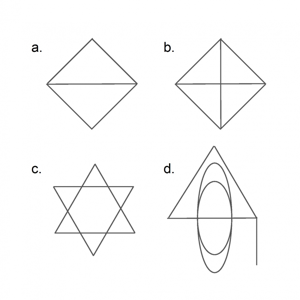

In [8]:
from PIL import Image
image = Image.open('konigsproblem.jpeg')
image.resize((300,300))

#### Which of the icons in Image 2.19 can be drawn without raising your pencil from the paper, and without drawing any line more than once? Why?

Icons (a) and 
A walking path that goes through all bridges can have only one starting and one end point. 
Thus such a path cannot exist on a graph that has more than two nodes with an odd number of links.

### Exercise 2.3 - Graph Representation

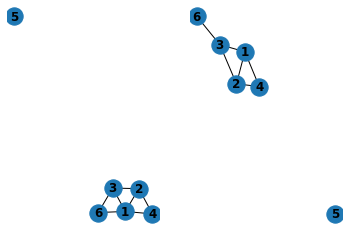

In [10]:
#Constructing the graphs
G1_unsorted = nx.Graph()
G1_unsorted.add_edges_from([(1, 2), (1, 4), (1,3), (1,6), (2,3), (2,4), (3,6)])
G1_unsorted.add_node(5)

#sort nodes 
G1 = nx.Graph()
G1.add_nodes_from(sorted(G1_unsorted.nodes(data=True)))
G1.add_edges_from(G1_unsorted.edges(data=True))


G2_unsorted = nx.DiGraph()
G2_unsorted.add_edges_from([(1, 2), (2, 3), (2,4), (2,4), (3,1), (3,2), (4,1), (6,3)])
G2_unsorted.add_node(5)

G2 = nx.Graph()
G2.add_nodes_from(sorted(G2_unsorted.nodes(data=True)))
G2.add_edges_from(G2_unsorted.edges(data=True))

subax1= plt.subplot(1,2,1)
nx.draw(G1, with_labels=True, font_weight='bold')


subax2=plt.subplot(1,2,2)
nx.draw(G2, with_labels=True, font_weight='bold')
plt.show()

In [11]:
# The adjacency matrices and their corresponding link lists
# A1: Undirected graph
A1 = nx.adjacency_matrix(G1)
print("Graph 1: \nAdjancency matrix \n", A1.todense(),"\n")

print("Link list:",G1.edges(),"\n")

# A2: Directed gaph
A2 = nx.adjacency_matrix(G2)
print("Graph 2: \nAdjacency matrix\n", A2.todense(),"\n")
print("Link list:", G2.edges())

Graph 1: 
Adjancency matrix 
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

Link list: [(1, 2), (1, 4), (1, 3), (1, 6), (2, 3), (2, 4), (3, 6)] 

Graph 2: 
Adjacency matrix
 [[0 1 1 1 0 0]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]] 

Link list: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 6)]


In [12]:
# The average clustering coefficient of the network
print(f"Average clustering coefficent of graph 1:\n{nx.average_clustering(G1):.3}")

Average clustering coefficent of graph 1:
0.639


In [13]:
# If you switch the labels of nodes 5 and 6 in graph 1, 
# how does that move change the adjacency matrix? And the link list?

mapping={5:6, 6:5}
G1_new_unsort=nx.relabel_nodes(G1,mapping)

G1_new = nx.Graph()
G1_new.add_nodes_from(sorted(G1_new_unsort.nodes(data=True)))
G1_new.add_edges_from(G1_new_unsort.edges(data=True))

A1 = nx.adjacency_matrix(G1)
print("Graph 1: \nAdjancency matrix \n", A1.todense(),"\n")
print("Link list:",G1.edges(),"\n")

A1_new = nx.adjacency_matrix(G1_new)
print("Graph 1 with node 5 and 6 switched: \nAdjancency matrix \n", A1_new.todense(),"\n")
print("Link list:",G1_new.edges(),"\n")

# All nodes that were previously linked to node 6, are now linked to node 5 instead. 
# This can be seen from both the adjacency list and the link list 
# fx the link between (1,6) has been replaced by (1,5) and the same applies to (3,6) being replaced by (3,5)


Graph 1: 
Adjancency matrix 
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

Link list: [(1, 2), (1, 4), (1, 3), (1, 6), (2, 3), (2, 4), (3, 6)] 

Graph 1 with node 5 and 6 switched: 
Adjancency matrix 
 [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]] 

Link list: [(1, 2), (1, 4), (1, 3), (1, 5), (2, 3), (2, 4), (3, 5)] 



#### What kind of information can you not infer from the link list representation of the network, that you can infer from the adjacency matrix?

The adjancency matrix is the suitable choice of graph representation, if you want to be able to distinguish an undirected graph from a directed one. 
Looking at the adjancency matrices and link lists for graph 1 and 2 for example, we can see that the link lists are exactly the same. The adjancency matrix, however, is symmetric for graph 1 as it is undirected, whereas the adjacency list for graph 2 is asymmetric as it is directed.

In [14]:
# In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 
# exist starting from node 1 and ending at node 3? And in (b)?

# paths in graph 1 
print("The possible paths in graph 1 from node 1 to 3 with a max. length of 3 is:")
for path in nx.all_simple_paths(G1, source=1, target=3, cutoff=3):
    if len(path)==3:
        print(path)

# paths in graph 2
print("\nThe possible paths in graph 2 from node 1 to 3 with a max. length of 3 is:")
for path in nx.all_simple_paths(G2, source=1, target=3, cutoff=3):
    if len(path)==3:
        print(path)

# In graph 1 two paths exist, whereas only 1 path is possible in the directed graph 2


The possible paths in graph 1 from node 1 to 3 with a max. length of 3 is:
[1, 2, 3]
[1, 6, 3]

The possible paths in graph 2 from node 1 to 3 with a max. length of 3 is:
[1, 2, 3]


### Exercise 2.5 - Bipartite Networks

In [15]:
from networkx.algorithms import bipartite

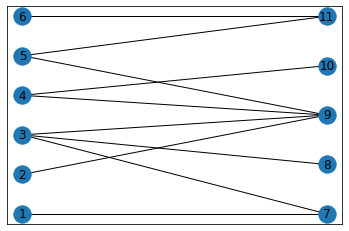

In [60]:
# Construction of bipartite graph from Image 2.21 in book

B_unsort = nx.Graph()
# Add nodes with the node attribute "bipartite"
B_unsort.add_nodes_from(range(1,7), bipartite=0)
B_unsort.add_nodes_from(range(7,12), bipartite=1)

# Add edges only between nodes of opposite node sets
B_unsort.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), 
                  (4, 9),(4, 10), (5, 9), (5, 11), (6,11)])

B = nx.Graph()
B.add_nodes_from(sorted(B_unsort.nodes(data=True)))
B.add_edges_from(B_unsort.edges(data=True))

# Bipartite sets
bottom_nodes, top_nodes = bipartite.sets(B)


nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, bottom_nodes))


In [17]:
# Construct its adjacency matrix. Why is it a block-diagonal matrix?

B1 = nx.adjacency_matrix(B)
print("Bipartite graph: \nAdjancency matrix \n", B1.todense(),"\n")

# In a block-diagonal adjacency matrix, the blocks containing non-zero elements usually represent 
# the respective disconnected components in a graph. 
# The bipartite graph consists of two sets of nodes (as can be seen in the photo above) of which 
# nodes in the first set only connect to nodes in the second set and vice versa. 
# Due to this, we have a kind of disconnected property internally in each set,
# and this is what we see in the adjacency list as block-diagonality. 

# The nodes in the first set (1-6) are only linked to nodes in the second set (7-11), 
# which creates the top-right non-zero block,
# and the nodes in the second set (7-11) are only linked to nodes in the first set (1-6)
# which creates the bottom-left non-zero block.
# The two zero-blocks in the adjacency matrix illustrates the diconnectivity between all nodes (1-6) and (7-11) in the 
# two respective bipartite sets.

Bipartite graph: 
Adjancency matrix 
 [[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]] 



Link list and graph for projection 1:
 [(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), (5, 6)]


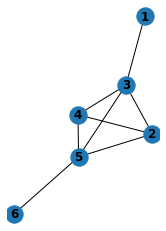

In [18]:
# Construct graph of projection 1 
P_low_unsort = bipartite.projected_graph(B, bottom_nodes, multigraph=True)
P_low = nx.Graph()
P_low.add_nodes_from(sorted(P_low_unsort.nodes(data=True)))
P_low.add_edges_from(P_low_unsort.edges(data=True))
print("Link list and graph for projection 1:\n", P_low.edges())

subax1= plt.subplot(1,2,1)
nx.draw(P_low, with_labels=True, font_weight='bold')


Link list and graph for projection 1:
 [(7, 8), (7, 9), (8, 9), (9, 10), (9, 11)]


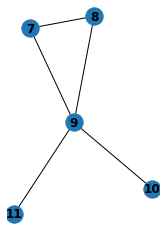

In [19]:
# Construct graph of projection 2
P_top_unsort = bipartite.projected_graph(B, top_nodes, multigraph=True)
P_top = nx.Graph()
P_top.add_nodes_from(sorted(P_top_unsort.nodes(data=True)))
P_top.add_edges_from(P_top_unsort.edges(data=True))
print("Link list and graph for projection 1:\n", P_top.edges())

subax2= plt.subplot(1,2,1)
nx.draw(P_top, with_labels=True, font_weight='bold')

In [20]:
# Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

P1 = nx.adjacency_matrix(P_low)
print("Bipartite graph projection 1: \nAdjancency matrix \n", P1.todense(),"\n")


P2 = nx.adjacency_matrix(P_top)
print("Bipartite graph projection 2: \nAdjancency matrix \n", P2.todense(),"\n")

Bipartite graph projection 1: 
Adjancency matrix 
 [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]] 

Bipartite graph projection 2: 
Adjancency matrix 
 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]] 



In [53]:
# Calculate the average degree of the purple nodes
# and the average degree of the green nodes in the bipartite network

# lower nodes average degree
sum_deg1 = 0
tot1 = 0
sum_deg2 = 0
tot2 = 0

for node in B.nodes():
    if node < 7:
        sum_deg1 += B.degree[node] 
        tot1 +=1
    
    else:
        sum_deg2 += B.degree[node] 
        tot2 +=1

ave_deg1 = sum_deg1/tot1
ave_deg2 = sum_deg2/tot2

print("The average degree of the purple nodes are: {:.2f}".format(ave_deg1))
print("\nThe average degree of the green nodes are: {:.2f}".format(ave_deg2))

The average degree of the purple nodes are: 1.67

The average degree of the green nodes are: 2.00


In [57]:
# Calculate the average degree in each of the two network projections. 
# Is it surprising that the values are different from those obtained in point (c)?

sum_proj1 = 0

for node in P_low.nodes():
    sum_proj1 += P_low.degree[node] 

ave_proj1 = sum_proj1/int(len(P_low))

# top nodes average degree
sum_proj2 = 0

for node in P_top.nodes():
    sum_proj2 += P_top.degree[node] 

ave_proj2 = sum_proj2/int(len(P_top))

print("The average degree of the purple projection are: {:.2f}".format(ave_proj1))
print("\nThe average degree of the green projection are: {:.2f}".format(ave_proj2))

# At first sight, it may seem surprising that the values obtained here are different from (c). However, looking 
# it can be explained by the following: In (c) the green nodes have the highest av. deg. In the purple projection
# nodes are linked, if they link to the same green node in the bipartite representation. Therefore it makes sense that 
# the purple projection graph will now be the one with the highest ave. deg. instead.



The average degree of the purple nodes are: 2.67

The average degree of the green nodes are: 2.00


# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [104]:
#load GME graph from week 3:
G = nx.read_gml("GME_graph.gml")
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 26373
Number of edges: 97159
Average in degree:   3.6840
Average out degree:   3.6840
